In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import sys

In [2]:
def combine_files(paths, output_path=None):
    df = pd.DataFrame()
    for path in paths:
        df_i = pd.read_csv(path,index_col=None)
        df = pd.concat([df, df_i], axis=0)
    if output_path is not None:
        df.to_csv(output_path,index=False)
    return df

In [3]:
def plotting(oper_char_df, x_axis='p', hue='method', plot_size=False):
    #sns.histplot(oper_char_df["sparsity size"])
    #plt.show()
    if plot_size:
        fig, (ax1, ax2, ax3, ax4, ax5, ax6, ax7) = plt.subplots(nrows=1, ncols=7, figsize=(12,8))
    else:
        fig, (ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(nrows=1, ncols=6, figsize=(12,8))

    print("Mean coverage rate/length:")
    print(oper_char_df.groupby([x_axis, hue]).mean())

    cov_plot = sns.boxplot(y=oper_char_df["coverage rate"],
                           x=oper_char_df[x_axis],
                           hue=oper_char_df[hue],
                           palette="pastel",
                           orient="v", ax=ax1,
                           showmeans=True,
                           linewidth=1)
    cov_plot.set(title='Coverage')
    cov_plot.set_ylim(0., 1.05)
    #plt.tight_layout()
    cov_plot.axhline(y=0.9, color='k', linestyle='--', linewidth=1)
    #ax1.set_ylabel("")  # remove y label, but keep ticks

    len_plot = sns.boxplot(y=oper_char_df["avg length"],
                           x=oper_char_df[x_axis],
                           hue=oper_char_df[hue],
                           palette="pastel",
                           orient="v", ax=ax2,
                           linewidth=1)
    len_plot.set(title='Length')
    # len_plot.set_ylim(0, 100)
    # len_plot.set_ylim(3.5, 7.8)
    # plt.tight_layout()
    # ax2.set_ylabel("")  # remove y label, but keep ticks

    handles, labels = ax2.get_legend_handles_labels()
    # fig.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.2)
    fig.subplots_adjust(bottom=0.2)
    fig.legend(handles, labels, loc='lower center', ncol=4)

    F1_plot = sns.boxplot(y=oper_char_df["F1 score"],
                          x=oper_char_df[x_axis],
                          hue=oper_char_df[hue],
                          palette="pastel",
                          orient="v", ax=ax3,
                          linewidth=1)
    F1_plot.set(title='F1 score')
    
    F1pi_plot = sns.boxplot(y=oper_char_df["F1 score (post inf)"],
                          x=oper_char_df[x_axis],
                          hue=oper_char_df[hue],
                          palette="pastel",
                          orient="v", ax=ax4,
                          linewidth=1)
    F1pi_plot.set(title='F1 score (post inf)')
    
    power_plot = sns.boxplot(y=oper_char_df["Cond. power"],
                          x=oper_char_df[x_axis],
                          hue=oper_char_df[hue],
                          palette="pastel",
                          orient="v", ax=ax5,
                          linewidth=1)
    power_plot.set(title='Conditional power')
    
    FDP_plot = sns.boxplot(y=oper_char_df["FDP"],
                          x=oper_char_df[x_axis],
                          hue=oper_char_df[hue],
                          palette="pastel",
                          orient="v", ax=ax6,
                          linewidth=1)
    FDP_plot.set(title='FDP')
    
    if plot_size:
        size_plot = sns.boxplot(y=oper_char_df["E size"],
                              x=oper_char_df[x_axis],
                              hue=oper_char_df[hue],
                              palette="pastel",
                              orient="v", ax=ax7,
                              linewidth=1)
        size_plot.set(title='|E|')

    cov_plot.legend_.remove()
    len_plot.legend_.remove()
    F1_plot.legend_.remove()
    F1pi_plot.legend_.remove()
    if plot_size:
        size_plot.legend_.remove()

    #plt.suptitle("Changing n,p")
    plt.subplots_adjust(wspace=0.6, hspace=0.5)
    plt.show()

In [4]:
paths_result = ["GGM_comp_logic1_0_100.csv"]
oper_char = combine_files(paths_result)

Mean coverage rate/length:
                             coverage rate  avg length  F1 score   
weight const method                                                
0.2          Approx               0.887711    0.334391  0.277647  \
             Data Splitting       0.876252    0.362660  0.263810   
             Naive                0.528533    0.248557  0.332352   
0.3          Approx               0.930714    0.339608  0.286983   
             Data Splitting       0.939667    0.360325  0.235387   
             Naive                0.420903    0.253078  0.330762   
0.4          Approx               0.885833    0.340693  0.251951   
             Data Splitting       0.881000    0.369810  0.241068   
             Naive                0.540000    0.258519  0.333076   
0.5          Approx               0.918333    0.331709  0.305268   
             Data Splitting       0.905000    0.375527  0.254287   
             Naive                0.378333    0.265026  0.312082   

                    

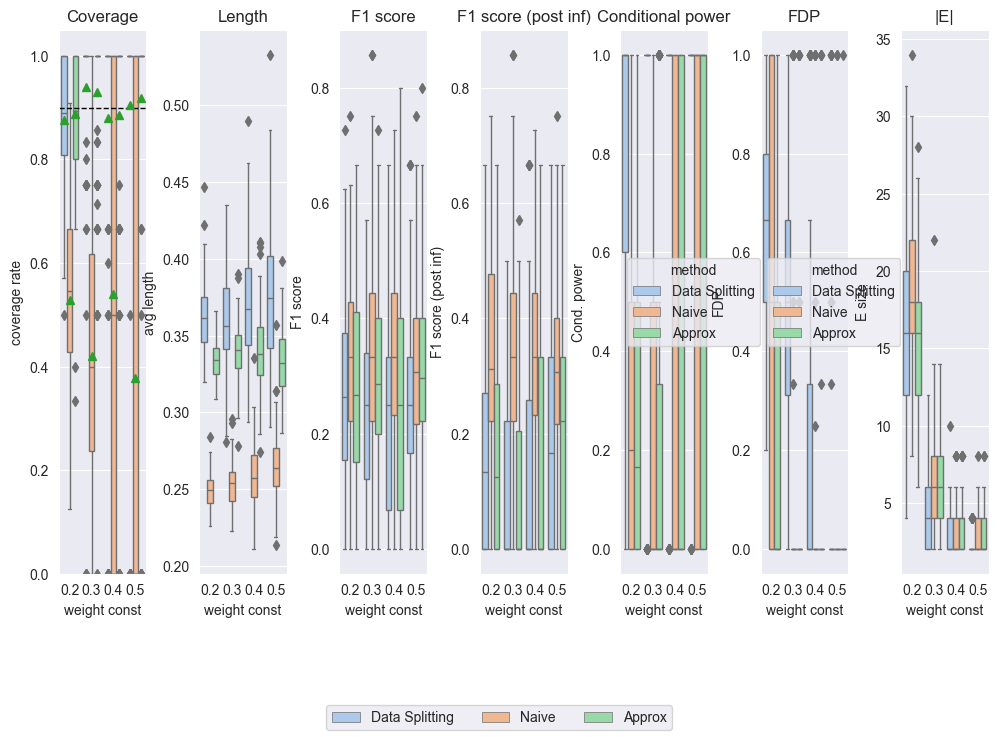

In [5]:
plotting(oper_char, x_axis="weight const", hue="method", plot_size=True)

# Plotting Motivating Example

In [13]:
paths_result = ["GGM_comp_logic1_0_100.csv", "GGM_comp_logic1_100_200.csv",
                "GGM_comp_logic1_additional1_0_200.csv"]
oper_char = combine_files(paths_result)

In [14]:
def point_plot(oper_char_df, x_axis='p', hue='method', plot_size=False):
    sns.set_style("white", {'axes.facecolor': 'white', 
                            'axes.grid': True,
                            'axes.linewidth': 2.0,
                            'grid.linestyle': u'--',
                            'grid.linewidth': 4.0,
                            'xtick.major.size': 5.0,
                           })
    #sns.histplot(oper_char_df["sparsity size"])
    #plt.show()
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
    
    if "method" in oper_char_df.columns:
    
        alias = {"Approx":"Proposed", 
                 "Naive":"Naive", 
                 "Data Splitting":"Data Splitting"}
        #order = [alias[meth] for meth in order]
        
        oper_char_df['method'] = oper_char_df['method'].map(alias)
        
        my_palette = {"Proposed": "#48c072", 
                  "Naive": "#fc5a50",
                  "Data Splitting": "#03719c"}
    
    print("Mean coverage rate/length:")
    print(oper_char_df.groupby([x_axis, hue]).mean())

    cov_plot = sns.pointplot(y=oper_char_df["coverage rate"],
                           x=oper_char_df[x_axis],
                           hue=oper_char_df[hue],
                           #hue_order=order, 
                           markers='o',
                           ax=ax1)
    
    #cov_plot.set(title='')
    """cov_plot.set_ylim(0., 1.05)
    #plt.tight_layout()
    cov_plot.axhline(y=0.9, color='k', linestyle='--', linewidth=1)"""
    ax1.set_ylabel("Coverage Rate", fontsize=15)  # remove y label, but keep ticks
    ax1.set_xlabel("Values of $\lambda$", fontsize=15)
    cov_plot.set_ylim(0., 1.05)
    #plt.tight_layout()
    cov_plot.axhline(y=0.9, color='k', linestyle='--', linewidth=1)

    len_plot = sns.pointplot(y=oper_char_df["avg length"],
                           x=oper_char_df[x_axis],
                           hue=oper_char_df[hue],
                           markers='o',
                           ax=ax2)
    #len_plot.set(title='Length')
    # len_plot.set_ylim(0, 100)
    # len_plot.set_ylim(3.5, 7.8)
    # plt.tight_layout()
    ax2.set_ylabel("Average Length", fontsize=15)  # remove y label, but keep ticks
    ax2.set_xlabel("Values of $\lambda$", fontsize=15)
    len_plot.set_ylim(0., 0.5)

    handles, labels = ax2.get_legend_handles_labels()
    # fig.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.2)
    
    ax1.tick_params(axis='x', labelsize=15)
    ax1.tick_params(axis='y', labelsize=15)
    ax2.tick_params(axis='x', labelsize=15)
    ax2.tick_params(axis='y', labelsize=15)
    
    fig.subplots_adjust(bottom=0.2)
    fig.legend(handles, labels, loc='lower center', ncol=4, prop={'size': 15})

    cov_plot.legend_.remove()
    len_plot.legend_.remove()

    #plt.suptitle("Changing n,p")
    plt.subplots_adjust(wspace=0.6, hspace=0.5)
    plt.show()

Mean coverage rate/length:
                             coverage rate  avg length  F1 score   
weight const method                                                
0.20         Data Splitting       0.890777    0.361533  0.249132  \
             Naive                0.539893    0.247478  0.330850   
             Proposed             0.891660    0.333016  0.265358   
0.25         Data Splitting       0.901232    0.360249  0.237420   
             Naive                0.390202    0.249478  0.336909   
             Proposed             0.899758    0.334572  0.238887   
0.30         Data Splitting       0.912333    0.362787  0.232682   
             Naive                0.433205    0.252302  0.339884   
             Proposed             0.927101    0.337154  0.280384   
0.35         Data Splitting       0.880333    0.362294  0.216105   
             Naive                0.510429    0.254248  0.351286   
             Proposed             0.894500    0.335805  0.287381   
0.40         Data Spl

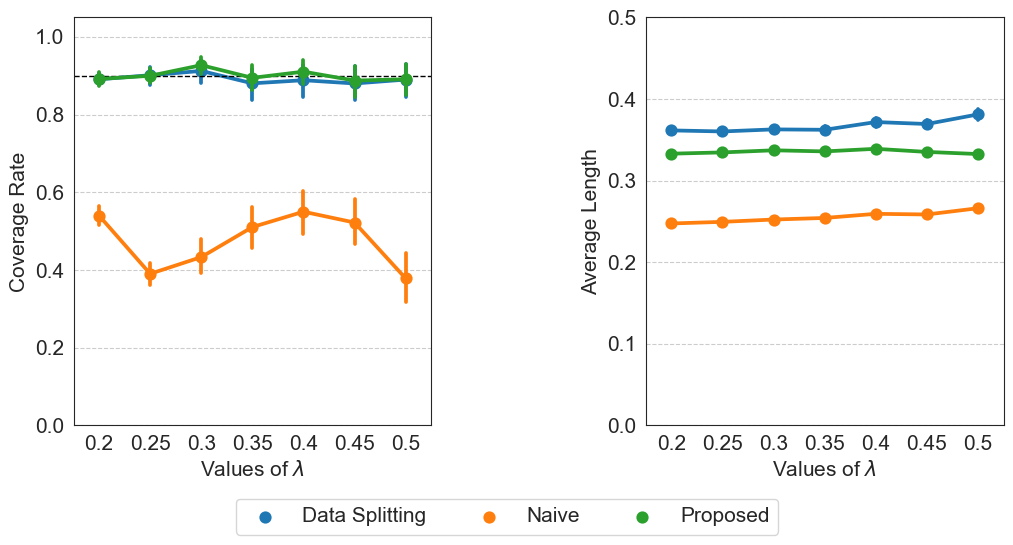

In [15]:
point_plot(oper_char, x_axis="weight const", hue="method", plot_size=True)

# Plotting Varying Signals

In [6]:
def point_plot_multimetrics(oper_char_df, x_axis='p', hue='method', plot_size=False,
                            metric_list=None):
    sns.set_style("white", {'axes.facecolor': 'white', 
                            'axes.grid': True,
                            'axes.linewidth': 2.0,
                            'grid.linestyle': u'--',
                            'grid.linewidth': 4.0,
                            'xtick.major.size': 5.0,
                           })
    #sns.histplot(oper_char_df["sparsity size"])
    #plt.show()
    n_subplots = len(metric_list)
    #cols = int(np.ceil(n_subplots / 2))
    cols = n_subplots
    
    if "method" in oper_char_df.columns:
        alias = {"Approx":"Proposed", 
                 "Naive":"Naive", 
                 "Data Splitting":"Data Splitting"}
        #order = [alias[meth] for meth in order]
    
        oper_char_df['method'] = oper_char_df['method'].map(alias)
    
    fig = plt.figure(figsize=(cols * 5, 6))
    
    my_palette = {"Proposed": "#48c072", 
                  "Naive": "#fc5a50",
                  "Data Splitting": "#03719c"}
    
    # Create each subplot
    for i in range(1, n_subplots + 1):
        # ax = fig.add_subplot(2, cols, i) #two rows
        ax = fig.add_subplot(1, cols, i) #one row
        if hue is not None:
            sns.pointplot(x=oper_char_df[x_axis], 
                          y=oper_char_df[metric_list[i-1]], 
                          hue = oper_char_df[hue],
                          markers='o',
                          palette=my_palette,
                          ax=ax)
        else:
            sns.pointplot(x=oper_char_df[x_axis], 
                          y=oper_char_df[metric_list[i-1]], 
                          markers='o',
                          palette=my_palette,
                          ax=ax)
        if metric_list[i-1] == 'coverage rate':
            ax.set_ylim([0, 1])
            ax.axhline(y=0.9, color='k', linestyle='--', linewidth=1)
        if metric_list[i-1] == 'coverage rate':
            ax.set_ylabel("Coverage Rate", fontsize=15)  # remove y label, but keep ticks
        elif metric_list[i-1] == 'avg length':
            ax.set_ylabel("Average Length", fontsize=15)  # remove y label, but keep ticks
        elif metric_list[i-1] == 'F1 score (post inf)':
            ax.set_ylabel("Accuracy", fontsize=15)  # remove y label, but keep ticks
        else: 
            ax.set_ylabel(metric_list[i-1], fontsize=15)  # remove y label, but keep ticks
        ax.legend().set_visible(False)
        #ax.set_title(f'Category: {metric_list[i-1]}')
        
        # ax.set_xlabel('Signal Strength', fontsize=15)
        ax.set_xlabel('Sparsity', fontsize=15)

    handles, labels = ax.get_legend_handles_labels()
    # fig.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.2)
    
    fig.subplots_adjust(bottom=0.2)
    fig.legend(handles, labels, loc='lower center', ncol=n_subplots,
               prop={'size': 15})

    #cov_plot.legend_.remove()
    #len_plot.legend_.remove()

    #plt.suptitle("Changing n,p")
    plt.subplots_adjust(wspace=0.3, hspace=0.5)
    plt.show()

In [9]:
"""paths_result = ["/Users/yilingh/Desktop/vary_signal/GGM_vary_signal_logic0_0_50.csv",
                "/Users/yilingh/Desktop/vary_signal/GGM_vary_signal_logic0_50_100.csv",
                "/Users/yilingh/Desktop/vary_signal/GGM_vary_signal_logic0_100_150.csv",
                "/Users/yilingh/Desktop/vary_signal/GGM_vary_signal_logic0_150_200.csv",
                "/Users/yilingh/Desktop/vary_signal/GGM_vary_signal_logic0_200_250.csv",
                "/Users/yilingh/Desktop/vary_signal/GGM_vary_signal_logic0_250_300.csv",
                "/Users/yilingh/Desktop/vary_signal/GGM_vary_signal_logic0_300_350.csv",
                "/Users/yilingh/Desktop/vary_signal/GGM_vary_signal_logic0_350_400.csv",
                "/Users/yilingh/Desktop/vary_signal/GGM_vary_signal_logic0_400_450.csv",
                "/Users/yilingh/Desktop/vary_signal/GGM_vary_signal_logic0_450_500.csv"]"""
paths_result = ["/Users/yilingh/Desktop/vary_signal/GGM_vary_sparsity1_500.csv"]
oper_char = combine_files(paths_result,)

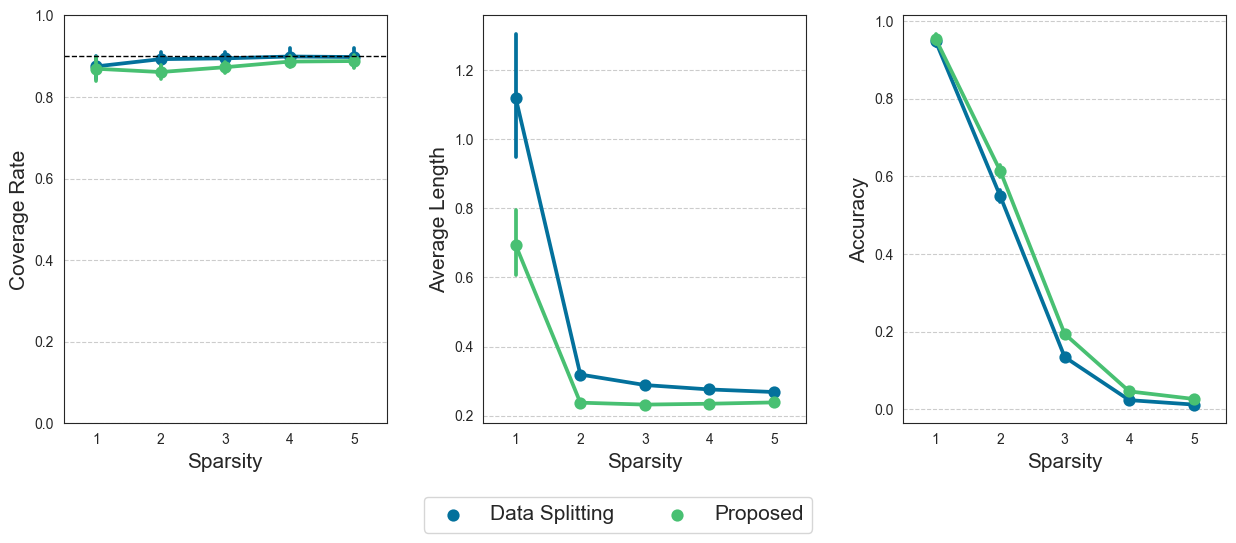

In [10]:
point_plot_multimetrics(oper_char, x_axis="m", 
                        hue='method', plot_size=True,
                        metric_list=['coverage rate', 'avg length',
                                     'F1 score (post inf)'])

# Plotting Varying Randomization Scale

In [29]:
paths_result = ["/Users/yilingh/Desktop/vary_omega/GGM_vary_omega_logic1_0_3.csv",
                "/Users/yilingh/Desktop/vary_omega/GGM_vary_omega_logic1_3_6.csv",
                "/Users/yilingh/Desktop/vary_omega/GGM_vary_omega_logic1_6_9.csv",
                "/Users/yilingh/Desktop/vary_omega/GGM_vary_omega_logic1_9_12.csv",
                "/Users/yilingh/Desktop/vary_omega/GGM_vary_omega_logic1_12_15.csv",
                "/Users/yilingh/Desktop/vary_omega/GGM_vary_omega_logic1_15_18.csv",
                "/Users/yilingh/Desktop/vary_omega/GGM_vary_omega_logic1_18_21.csv",
                "/Users/yilingh/Desktop/vary_omega/GGM_vary_omega_logic1_21_24.csv",
                "/Users/yilingh/Desktop/vary_omega/GGM_vary_omega_logic1_24_27.csv",
                "/Users/yilingh/Desktop/vary_omega/GGM_vary_omega_logic1_27_30.csv",
                ]
oper_char = combine_files(paths_result,
                          "/Users/yilingh/Desktop/GGM_vary_omega_logic1_30.csv")

In [31]:
point_plot_multimetrics(oper_char, x_axis="randomizer variance", 
                        plot_size=True, hue=None,
                        metric_list=['coverage rate', 'avg length',
                                     'F1 score (post inf)'])

KeyError: 'method'